In [1]:
from pathlib import Path
import pandas as pd
from tlo.analysis.utils import extract_results, summarize, load_pickled_dataframes
from tlo import Date
import matplotlib.pyplot as plt

folder = Path("/Users/rem76/PycharmProjects/TLOmodel/outputs/rm916@ic.ac.uk/longterm_trends_all_diseases-2024-09-25T110820Z")
nd = extract_results(
    folder,
    module="tlo.methods.demography.detail",
    key="properties_of_deceased_persons",
    custom_generate_series=(
        lambda df: df.loc[(df['age_days'] < 364) & (df['age_years'] == 0)].assign(
            year=df['date'].dt.year).groupby(['year'])['year'].count()),
    do_scaling=True)
neo_deaths = nd.fillna(0)


/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/utils.py:354: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  'mean': results.groupby(axis=1, by='draw', sort=False).mean(),
/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/utils.py:355: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  'lower': results.groupby(axis=1, by='draw', sort=False).quantile(0.025),
/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/utils.py:356: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  'upper': results.groupby(axis=1, by='draw', sort=False).quantile(0.975),


draw         0                    
stat     lower      mean     upper
year                              
2010  0.605177  0.645470  0.680882
2011  0.631814  0.687691  0.764528
2012  0.695643  0.732844  0.774998
2013  0.705951  0.737259  0.770028
2014  0.698455  0.734365  0.779218
2015  0.634488  0.701700  0.755725
2016  0.663023  0.696696  0.740966
2017  0.645000  0.693301  0.762864
2018  0.674157  0.715324  0.752966
2019  0.689657  0.715267  0.742271
2020  0.748647  0.795526  0.854935
2021  0.715837  0.778859  0.830243
2022  0.734550  0.778003  0.837679
2023  0.774594  0.802044  0.853670
2024  0.754652  0.796360  0.835467
2025  0.769389  0.794466  0.823541
2026  0.735740  0.792826  0.826426
2027  0.718675  0.786790  0.862405
2028  0.739360  0.802089  0.865714
2029  0.732917  0.785376  0.824229
2030  0.745196  0.791489  0.846147
2031  0.756750  0.813418  0.895108
2032  0.779664  0.822025  0.868650
2033  0.777537  0.821997  0.859570
2034  0.781378  0.834737  0.891493
2035  0.753273  0.83

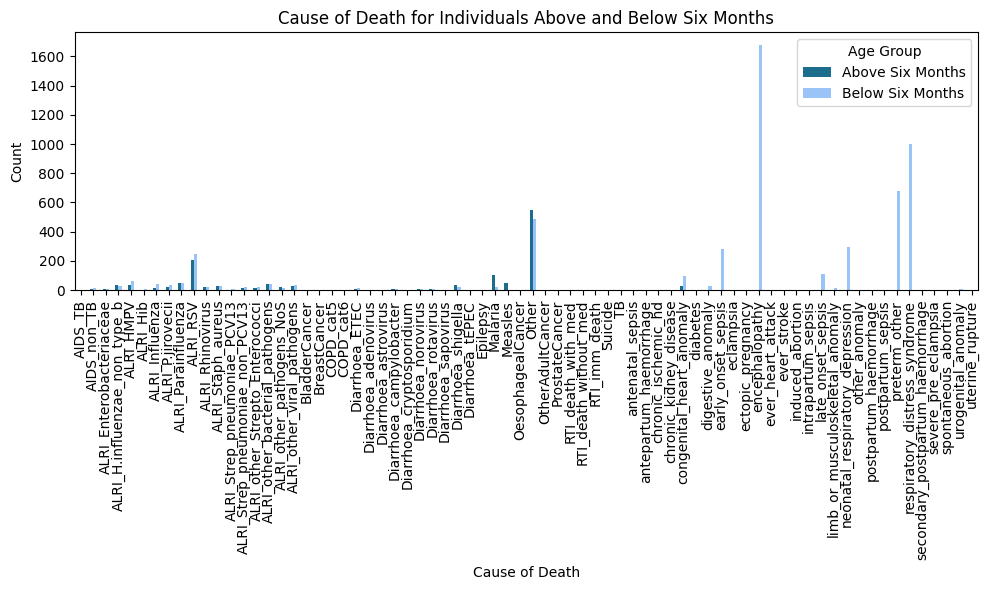

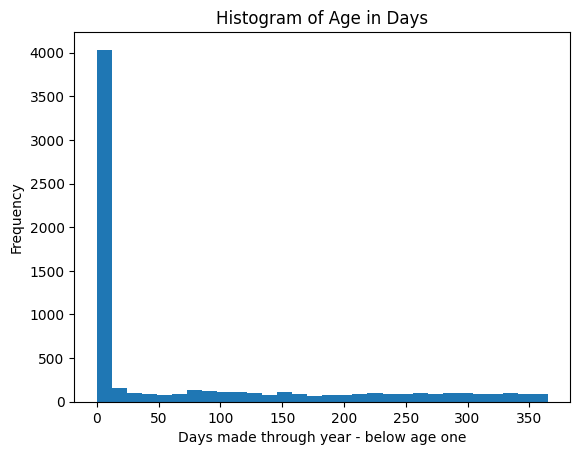

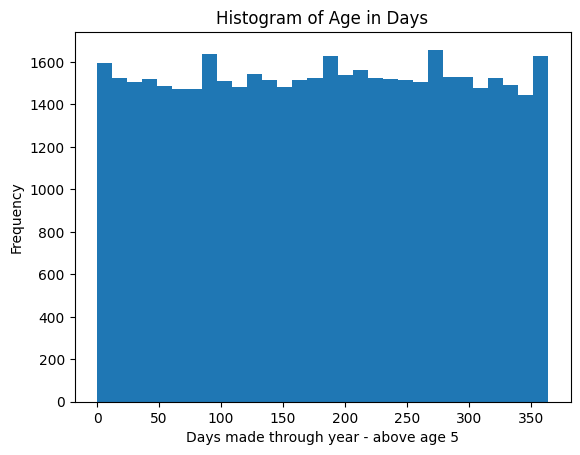

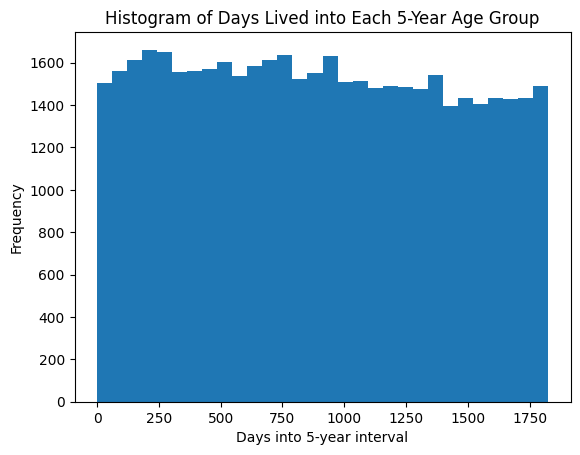

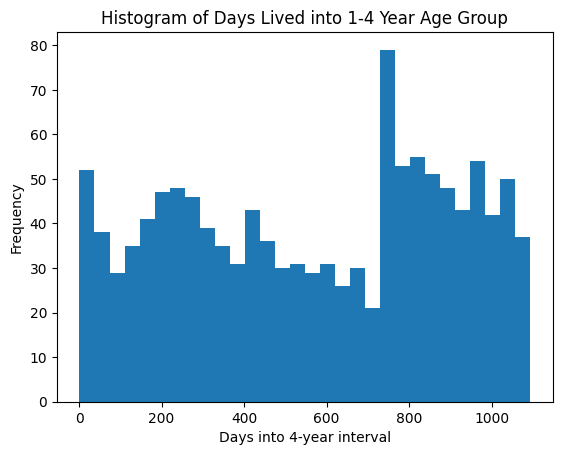

In [2]:

nd_first_half = extract_results(
    folder,
    module="tlo.methods.demography.detail",
    key="properties_of_deceased_persons",
    custom_generate_series=(
        lambda df: df.loc[(df['age_days'] < 182) & (df['age_years'] == 0)].assign(
            year=df['date'].dt.year).groupby(['year'])['year'].count()),
    do_scaling=True)
nd_first_half_deaths = nd_first_half.fillna(0)
nd_first_half_deaths.to_csv("nd_first_half_deaths.csv")
#print(nd_first_half_deaths/neo_deaths)

print(summarize(nd_first_half_deaths/neo_deaths))


## number of deaths by cause
output = load_pickled_dataframes(folder)  # parse output file

demography_details_death = output['tlo.methods.demography.detail']['properties_of_deceased_persons']
demog_below_six_months = demography_details_death.loc[(demography_details_death.age_days < 182) & (demography_details_death['age_years'] == 0)]
demog_above_six_months = demography_details_death.loc[(demography_details_death.age_days > 182)& (demography_details_death['age_years'] == 0)]

below_six_months_counts = demog_below_six_months['cause_of_death'].value_counts()
above_six_months_counts= demog_above_six_months['cause_of_death'].value_counts()


combined_counts = pd.DataFrame({
    'Above Six Months': above_six_months_counts,
    'Below Six Months': below_six_months_counts
}).fillna(0)  # Fill NaN with 0 for causes not present in both groups

print(combined_counts)
# Plotting
combined_counts.plot(kind='bar', color=['#1C6E8C', '#9AC4F8'], figsize=(10, 6))
plt.title('Cause of Death for Individuals Above and Below Six Months')
plt.xlabel('Cause of Death')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

### All age days, all years?
below_one_year = demography_details_death[demography_details_death["age_years"] < 1]
below_one_year['age_days'].plot(kind='hist', bins=30)  # Adjust bins as needed
plt.xlabel("Days made through year - below age one")
plt.ylabel("Frequency")
plt.title("Histogram of Age in Days")
plt.show()


### All age days, above 5 years
above_five_years = demography_details_death[demography_details_death["age_years"] > 5]
how_far_in_year = above_five_years['age_days'] % 365
how_far_in_year.plot(kind='hist', bins=30)  # Adjust bins as needed
plt.xlabel("Days made through year - above age 5")
plt.ylabel("Frequency")
plt.title("Histogram of Age in Days")
plt.show()


### How far into 5 year age groups
above_five_years = demography_details_death[demography_details_death["age_years"] > 5]
age_5_year_groups = (above_five_years['age_years'] // 5) * 5  # Group ages in 5-year intervals
days_in_5_year_group = (above_five_years['age_days'] % (5 * 365))
days_in_5_year_group.plot(kind='hist', bins=30)
plt.xlabel("Days into 5-year interval")
plt.ylabel("Frequency")
plt.title("Histogram of Days Lived into Each 5-Year Age Group")
plt.show()


### How far into 1-4 year age groups
below_five_years = demography_details_death[(demography_details_death["age_years"] > 1) & (demography_details_death["age_years"] < 5)]
days_in_3_year_group = (below_five_years['age_days'] % (3 * 365))
days_in_3_year_group.plot(kind='hist', bins=30)
plt.xlabel("Days into 4-year interval")
plt.ylabel("Frequency")
plt.title("Histogram of Days Lived into 1-4 Year Age Group")
plt.show()



# WPP Mortality 

In [33]:
WPP_from_R_package = pd.read_csv("/Users/rem76/Downloads/Malawi_mortality_WPP.csv")
WPP_from_R_package_2010 = WPP_from_R_package[WPP_from_R_package['year'] == 2010]
WPP_from_R_package_2010 = WPP_from_R_package_2010[WPP_from_R_package_2010['age']<91]


In [35]:
from tlo.analysis.life_expectancy import _estimate_life_expectancy, _aggregate_person_years_by_age, calculate_probability_of_dying
import datetime


Get person years lived

In [36]:

results_folder = Path('/Users/rem76/PycharmProjects/TLOmodel/outputs/rm916@ic.ac.uk/longterm_trends_all_diseases-2024-09-25T110820Z')
target_period = (datetime.date(2010, 1, 1), datetime.date(2010, 12, 31))
PY_by_age =  _aggregate_person_years_by_age(results_folder, target_period) 

/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/life_expectancy.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .pipe(lambda x: x.groupby(_map_age_to_age_group(x.index.astype(float))).sum())
/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/life_expectancy.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .pipe(lambda x: x.groupby(_map_age_to_age_group(x.index.astype(float))).sum())
/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/life_expectancy.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=

Get probability of dying. 
First need to convert WPP to deaths per age group

In [37]:
WPP_from_R_package_2010['mxM'] *= 1000
WPP_from_R_package_2010['mxF'] *= 1000
WPP_from_R_package_2010['mxB'] *= 1000

,country_code,name,year,age,mxM,mxF,mxB
0,454,Malawi,2010,0,66.77647,54.23736,60.49783
1,454,Malawi,2010,1,11.14161,10.16243,10.64989
2,454,Malawi,2010,2,7.15577,6.25058,6.70066
3,454,Malawi,2010,3,4.91367,4.19305,4.55114
4,454,Malawi,2010,4,3.51336,2.94466,3.22718
...,...,...,...,...,...,...,...
86,454,Malawi,2010,86,211.68965,168.61715,184.23372
87,454,Malawi,2010,87,227.06385,182.30762,198.35327
88,454,Malawi,2010,88,244.16393,197.85339,214.30683
89,454,Malawi,2010,89,260.28546,212.25013,229.18113


In [39]:
PY_by_age_run_1 = PY_by_age[0][0]
Deaths_by_age_run_1_M = WPP_from_R_package_2010['mxM']
Deaths_by_age_run_1_F = WPP_from_R_package_2010['mxF']


In [42]:
age_groups = [f"{i}-{i}" for i in range(90)] + ["90"]
male_index = pd.MultiIndex.from_product([["M"], age_groups], names=["sex", "age_group"])
female_index = pd.MultiIndex.from_product([["F"], age_groups], names=["sex", "age_group"])
Deaths_by_age_run_1_M.index = male_index
Deaths_by_age_run_1_F.index = female_index
Deaths_by_age_combined = pd.concat([Deaths_by_age_run_1_M, Deaths_by_age_run_1_F])

MultiIndex([('M',   '0-0'),
            ('M',   '1-1'),
            ('M',   '2-2'),
            ('M',   '3-3'),
            ('M',   '4-4'),
            ('M',   '5-5'),
            ('M',   '6-6'),
            ('M',   '7-7'),
            ('M',   '8-8'),
            ('M',   '9-9'),
            ...
            ('F', '81-81'),
            ('F', '82-82'),
            ('F', '83-83'),
            ('F', '84-84'),
            ('F', '85-85'),
            ('F', '86-86'),
            ('F', '87-87'),
            ('F', '88-88'),
            ('F', '89-89'),
            ('F',    '90')],
           names=['sex', 'age_group'], length=182)

In [45]:
LE_estimate = _estimate_life_expectancy(PY_by_age_run_1,Deaths_by_age_combined )

age_group
0-0        0.035080
1-1        0.005954
2-2        0.003805
3-3        0.002787
4-4        0.002120
            ...    
86-86     53.323893
87-87    136.518636
88-88    474.366359
89-89    436.097542
90       200.399449
Length: 91, dtype: float64
age_group
0-0       0.028459
1-1       0.005450
2-2       0.003439
3-3       0.002403
4-4       0.001773
           ...    
86-86    19.267140
87-87    22.322447
88-88    22.106439
89-89    49.050528
90       29.858635
Length: 91, dtype: float64


/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/life_expectancy.py:170: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  number_alive_at_start_of_interval[i] = (1 - probability_of_dying_in_interval[i - 1]) * \
/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/life_expectancy.py:184: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  number_alive_at_start_of_interval[i + 1] + fraction_of_last_age_survived[i] * number_dying_in_interval[
/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/life_expectancy.py:187: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integ

In [46]:
LE_estimate

{'M': 45.29873918703265, 'F': 48.41468872669043}

Functionalize it and make a graph 

In [ ]:
def calculate_LE_from_WPP(year, PY_data, WPP_data):
    
    

In [48]:
years = range(2010, 2020)
WPP_from_R_package = pd.read_csv("/Users/rem76/Downloads/Malawi_mortality_WPP.csv")
WPP_from_R_package['mxM'] *= 1000
WPP_from_R_package['mxF'] *= 1000
WPP_from_R_package['mxB'] *= 1000
WPP_from_R_package_below_90 = WPP_from_R_package[WPP_from_R_package['age']<91]
LE_male = []
LE_female = []
for year in years:
    results_folder = Path('/Users/rem76/PycharmProjects/TLOmodel/outputs/rm916@ic.ac.uk/longterm_trends_all_diseases-2024-09-25T110820Z')
    target_period = (datetime.date(year, 1, 1), datetime.date(year, 12, 31))
    PY_by_age =  _aggregate_person_years_by_age(results_folder, target_period) 
    WPP_from_R_package_for_year = WPP_from_R_package_below_90[WPP_from_R_package_below_90['year'] == year]
    PY_by_age_run_1 = PY_by_age[0][0]
    Deaths_by_age_run_1_M = WPP_from_R_package_for_year['mxM']
    Deaths_by_age_run_1_F = WPP_from_R_package_for_year['mxF']
    age_groups = [f"{i}-{i}" for i in range(90)] + ["90"]
    male_index = pd.MultiIndex.from_product([["M"], age_groups], names=["sex", "age_group"])
    female_index = pd.MultiIndex.from_product([["F"], age_groups], names=["sex", "age_group"])
    Deaths_by_age_run_1_M.index = male_index
    Deaths_by_age_run_1_F.index = female_index
    Deaths_by_age_combined = pd.concat([Deaths_by_age_run_1_M, Deaths_by_age_run_1_F])
    LE_estimate = _estimate_life_expectancy(PY_by_age_run_1,Deaths_by_age_combined )
    LE_male.append(LE_estimate['M'])
    LE_female.append(LE_estimate['F'])


/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/life_expectancy.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .pipe(lambda x: x.groupby(_map_age_to_age_group(x.index.astype(float))).sum())
/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/life_expectancy.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .pipe(lambda x: x.groupby(_map_age_to_age_group(x.index.astype(float))).sum())
/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/life_expectancy.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=

age_group
0-0        0.035080
1-1        0.005954
2-2        0.003805
3-3        0.002787
4-4        0.002120
            ...    
86-86     53.323893
87-87    136.518636
88-88    474.366359
89-89    436.097542
90       200.399449
Length: 91, dtype: float64
age_group
0-0       0.028459
1-1       0.005450
2-2       0.003439
3-3       0.002403
4-4       0.001773
           ...    
86-86    19.267140
87-87    22.322447
88-88    22.106439
89-89    49.050528
90       29.858635
Length: 91, dtype: float64
age_group
0-0        0.031546
1-1        0.005395
2-2        0.003510
3-3        0.002400
4-4        0.001839
            ...    
86-86     54.222193
87-87     57.059548
88-88    146.610596
89-89    510.214988
90       140.319758
Length: 91, dtype: float64
age_group
0-0       0.026057
1-1       0.004901
2-2       0.003063
3-3       0.002104
4-4       0.001552
           ...    
86-86    13.972036
87-87    21.363629
88-88    24.808662
89-89    23.583962
90       19.208379
Length: 91, dtype: fl

/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/life_expectancy.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .pipe(lambda x: x.groupby(_map_age_to_age_group(x.index.astype(float))).sum())
/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/life_expectancy.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .pipe(lambda x: x.groupby(_map_age_to_age_group(x.index.astype(float))).sum())
/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/life_expectancy.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=

age_group
0-0        0.029456
1-1        0.004728
2-2        0.003192
3-3        0.002212
4-4        0.001582
            ...    
86-86     52.563112
87-87     70.464043
88-88     77.068483
89-89    155.598889
90       111.386600
Length: 91, dtype: float64
age_group
0-0       0.023853
1-1       0.004385
2-2       0.002753
3-3       0.001878
4-4       0.001359
           ...    
86-86    11.127490
87-87    16.385938
88-88    25.838877
89-89    27.816837
90       11.387543
Length: 91, dtype: float64
age_group
0-0        0.030260
1-1        0.004270
2-2        0.002805
3-3        0.002033
4-4        0.001470
            ...    
86-86     40.918686
87-87     60.971963
88-88     86.017450
89-89    137.930700
90        67.655661
Length: 91, dtype: float64
age_group
0-0       0.024684
1-1       0.003830
2-2       0.002429
3-3       0.001680
4-4       0.001211
           ...    
86-86     8.206187
87-87    14.533885
88-88    19.078406
89-89    31.230492
90        9.328267
Length: 91, dtype: fl

/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/life_expectancy.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .pipe(lambda x: x.groupby(_map_age_to_age_group(x.index.astype(float))).sum())
/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/life_expectancy.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .pipe(lambda x: x.groupby(_map_age_to_age_group(x.index.astype(float))).sum())
/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/life_expectancy.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=

age_group
0-0        0.026817
1-1        0.004240
2-2        0.002503
3-3        0.001766
4-4        0.001348
            ...    
86-86     19.915776
87-87     50.106097
88-88     65.444137
89-89    127.688058
90        57.930334
Length: 91, dtype: float64
age_group
0-0       0.022827
1-1       0.003869
2-2       0.002141
3-3       0.001502
4-4       0.001099
           ...    
86-86     7.496951
87-87    10.200986
88-88    19.053832
89-89    22.853270
90        8.237591
Length: 91, dtype: float64
age_group
0-0       0.024344
1-1       0.003701
2-2       0.002547
3-3       0.001613
4-4       0.001198
           ...    
86-86    19.926227
87-87    24.725422
88-88    53.676933
89-89    75.929348
90       50.756338
Length: 91, dtype: float64
age_group
0-0       0.020414
1-1       0.003480
2-2       0.002163
3-3       0.001322
4-4       0.000987
           ...    
86-86     6.013425
87-87     9.182431
88-88    11.784634
89-89    22.525981
90        6.881692
Length: 91, dtype: float64


/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/life_expectancy.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .pipe(lambda x: x.groupby(_map_age_to_age_group(x.index.astype(float))).sum())
/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/life_expectancy.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .pipe(lambda x: x.groupby(_map_age_to_age_group(x.index.astype(float))).sum())
/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/life_expectancy.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=

age_group
0-0       0.022708
1-1       0.003180
2-2       0.002159
3-3       0.001614
4-4       0.001077
           ...    
86-86    19.489990
87-87    24.924679
88-88    29.463367
89-89    69.098225
90       33.100324
Length: 91, dtype: float64
age_group
0-0       0.018614
1-1       0.003089
2-2       0.002016
3-3       0.001397
4-4       0.000907
           ...    
86-86     6.515583
87-87     7.023081
88-88    11.264611
89-89    15.197041
90        5.893552
Length: 91, dtype: float64
age_group
0-0       0.020402
1-1       0.002913
2-2       0.001915
3-3       0.001404
4-4       0.001107
           ...    
86-86    26.269441
87-87    22.607824
88-88    28.773984
89-89    32.066703
90       27.602692
Length: 91, dtype: float64
age_group
0-0       0.016792
1-1       0.002843
2-2       0.001801
3-3       0.001307
4-4       0.000961
           ...    
86-86     7.622444
87-87     7.822308
88-88     8.542963
89-89    15.019271
90        5.081691
Length: 91, dtype: float64


/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/life_expectancy.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .pipe(lambda x: x.groupby(_map_age_to_age_group(x.index.astype(float))).sum())
/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/life_expectancy.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .pipe(lambda x: x.groupby(_map_age_to_age_group(x.index.astype(float))).sum())
/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/life_expectancy.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=

age_group
0-0       0.019148
1-1       0.002653
2-2       0.001814
3-3       0.001289
4-4       0.000989
           ...    
86-86    31.816519
87-87    32.764770
88-88    24.402461
89-89    33.444784
90       19.025108
Length: 91, dtype: float64
age_group
0-0      0.015239
1-1      0.002623
2-2      0.001674
3-3      0.001187
4-4      0.000914
           ...   
86-86    5.645622
87-87    9.112321
88-88    9.990838
89-89    9.393099
90       4.460823
Length: 91, dtype: float64
age_group
0-0       0.018018
1-1       0.002370
2-2       0.001564
3-3       0.001155
4-4       0.000868
           ...    
86-86    15.739511
87-87    37.909934
88-88    49.918159
89-89    28.780009
90       16.266406
Length: 91, dtype: float64
age_group
0-0       0.014575
1-1       0.002422
2-2       0.001558
3-3       0.001116
4-4       0.000839
           ...    
86-86     5.882712
87-87     6.679128
88-88    11.206375
89-89    11.782238
90        3.476713
Length: 91, dtype: float64


/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/life_expectancy.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .pipe(lambda x: x.groupby(_map_age_to_age_group(x.index.astype(float))).sum())
/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/life_expectancy.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .pipe(lambda x: x.groupby(_map_age_to_age_group(x.index.astype(float))).sum())
/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/life_expectancy.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=

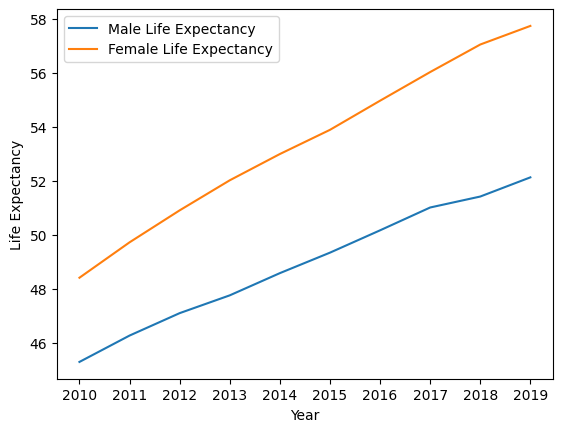

In [53]:
wpp_le = pd.read_csv("/Users/rem76/PycharmProjects/TLOmodel/src/scripts/longterm_projections/Life_Expectancy_WPP_2010_2014.csv")
le_all_years = pd.read_csv('/Users/rem76/PycharmProjects/TLOmodel/outputs/rm916@ic.ac.uk/longterm_trends_all_diseases-2024-09-25T110820Z/life_expectancy_estimates.csv')
plt.plot(wpp_le['Time'], wpp_le['Value'], marker='o', color='blue', label="WPP")

plt.plot(wpp_le['Year'], wpp_le['LE_female'], label="WPP Female Life Expectancy", linestyle="--")
plt.plot(le_all_years['Year'], le_all_years['LE_male'], label="Estimate Male Life Expectancy", linestyle=":")
plt.plot(le_all_years['Year'], le_all_years['LE_female'], label="Estimate Female Life Expectancy", linestyle=":")


plt.plot(range(len(LE_male)), LE_male, label="Male Life Expectancy")
plt.plot(range(len(LE_female)), LE_female, label="Female Life Expectancy")
plt.xticks(ticks=range(len(LE_male)), labels=range(2010, 2010 + len(LE_male)))
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.legend()